# Comparisons, Masks, and Boolean Logic

## Example: Counting Rainy Days

In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('/home/juclops/Documents/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

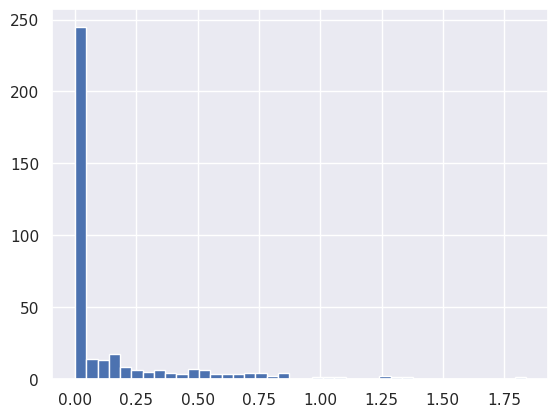

In [3]:
plt.hist(inches, 40);

## Diggin into the data

# Comparison Operators as ufuncs

In [4]:
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than

array([ True,  True, False, False, False])

In [5]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [6]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [7]:
x >= 3 # greater than or equal

array([False, False,  True,  True,  True])

In [8]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [9]:
x == 3  # equal

array([False, False,  True, False, False])

In [10]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

### Operator Equivalent ufunc Operator Equivalent ufunc

In [11]:
# ==   np.equal    !=   np.not_equal
# <    np.less     <=   np.less_equal
# >    np.greater  >=   np.greater_equal

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

# Working with Boolean Arrays

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


## Counting entries

In [15]:
# how manu values less than 6?
np.count_nonzero(x < 6)

8

In [16]:
np.sum(x < 6)

8

In [17]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [18]:
# are there any values greater than 8?
np.any(x > 8)

True

In [19]:
# are there any values less than zero?
np.any(x < 0)

False

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

In [22]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

In [23]:
np.sum((inches > 0.5) & (inches < 1))

29

In [24]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

### Operator Equivalent ufunc Operator Equivalen ufunc

In [25]:
#  &   np.bitwise_and  |  np.bitwise_or
#  ^   np.bitwise_xor  ~  np.bitwise_not

In [26]:
print("Number days without rain:       ", np.sum(inches == 0))
print("Number days with rain:          ", np.sum(inches != 0))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:   ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:        215
Number days with rain:           150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches:    75


# Boolean Arrays as Masks

In [27]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [29]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [30]:
# Construct a mas of all rainy days
rainy = (inches > 0)

# construct a mas of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

In [31]:
print("Median precip on rainy days in 2014 (inches):    ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):   ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):  ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):     0.19488188976377951
Median precip on summer days in 2014 (inches):    0.0
Maximum precip on summer days in 2014 (inches):   0.8503937007874016
Median precip on non-summer rainy days (inches):  0.20078740157480315


# Aside: Using the Keywords and/or Versus the operators &/|

In [32]:
bool(42), bool(0)

(True, False)

In [33]:
bool(42 and 0)

False

In [34]:
bool(42 or 0)

True

In [35]:
bin(42)

'0b101010'

In [36]:
bin(59)

'0b111011'

In [37]:
bin(42 & 59)

'0b101010'

In [38]:
bin(42 | 59)

'0b111011'

In [39]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [40]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

In [ ]:
(x > 4) and (x < 8)